In [ ]:
!pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"isshaansingh","key":"1a8484ca7892dbd493337396f790e401"}'}

In [ ]:
!mkdir ~/.kaggle

In [ ]:
!cp kaggle.json ~/.kaggle/

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d joebeachcapital/defungi

Dataset URL: https://www.kaggle.com/datasets/joebeachcapital/defungi
License(s): Attribution 4.0 International (CC BY 4.0)
 99% 148M/149M [00:09<00:00, 18.7MB/s]
100% 149M/149M [00:09<00:00, 16.9MB/s]


In [ ]:
import shutil
import os

# Define the paths
zip_file_path = '/content/defungi.zip'
destination_folder = '/content/data/'

# Check if the destination folder exists, if not create it
if not os.path.exists(destination_folder):
    os.makedirs(destination_folder)

# Move the zip file to the destination folder
shutil.move(zip_file_path, destination_folder)

'/content/data/defungi.zip'

In [ ]:
import requests
import zipfile
from pathlib import Path

# Setup path to a data folder
data_path = Path("data/")
image_path = data_path / "defungi"

# Print the type of image_path
print(f"Type of image_path: {type(image_path)}")

# If the image folder doesn't exist, download it and prepare it
if image_path.is_dir():
    print(f"{image_path} directory already exists ... skipping download")
elif image_path.is_file():
    print(f"{image_path} exists as a file ... removing it and creating a directory")
    image_path.unlink()
    image_path.mkdir(parents=True, exist_ok=True)
else:
    print(f"{image_path} does not exist ... creating one")
    image_path.mkdir(parents=True, exist_ok=True)

# Unzip landcoverai data
with zipfile.ZipFile(data_path / "defungi.zip", "r") as zip_ref:

    zip_ref.extractall(image_path)

Type of image_path: <class 'pathlib.PosixPath'>
data/defungi does not exist ... creating one


In [ ]:
# %% Imports
import torch
import torch.nn as nn
import torchvision
import torchvision.models as models
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt
import torch.optim as optim
import copy
import pandas as pd

# Set GPU device
print(torch.cuda.is_available())
device = torch.device("cuda:0")

True


In [ ]:
import os
import shutil
from sklearn.model_selection import train_test_split

# Define source and destination paths
source_dir = '/content/data/defungi'
train_dir = '/content/data/defungi_split/train'
test_dir = '/content/data/defungi_split/test'

# Labels folders
label_folders = ['H1', 'H2', 'H3', 'H5', 'H6']

# Create train and test directories
os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

# Loop through each label folder
for label in label_folders:
    # Define full path to each label directory
    label_path = os.path.join(source_dir, label)

    # Get all files in the current label directory
    files = os.listdir(label_path)

    # Split files into train and test sets (80% train, 20% test)
    train_files, test_files = train_test_split(files, test_size=0.2, random_state=42)

    # Create directories for the current label in train and test folders
    os.makedirs(os.path.join(train_dir, label), exist_ok=True)
    os.makedirs(os.path.join(test_dir, label), exist_ok=True)

    # Move training files
    for file in train_files:
        src = os.path.join(label_path, file)
        dest = os.path.join(train_dir, label, file)
        shutil.move(src, dest)

    # Move testing files
    for file in test_files:
        src = os.path.join(label_path, file)
        dest = os.path.join(test_dir, label, file)
        shutil.move(src, dest)

print('Data split complete.')


Data split complete.


In [ ]:
# import pandas as pd
# from google.colab import drive

# drive.mount('/content/gdrive', force_remount=True)

In [ ]:
# %% Load data
TRAIN_ROOT = '/content/data/defungi_split/train'
TEST_ROOT = '/content/data/defungi_split/test'
train_dataset = torchvision.datasets.ImageFolder(root=TRAIN_ROOT)
test_dataset = torchvision.datasets.ImageFolder(root=TRAIN_ROOT)

5 epochs

Downloading: "https://download.pytorch.org/models/mobilenet_v2-7ebf99e0.pth" to /root/.cache/torch/hub/checkpoints/mobilenet_v2-7ebf99e0.pth
100%|██████████| 13.6M/13.6M [00:00<00:00, 206MB/s]



Training ResNet18...
Epoch [1/5], Loss: 0.9711
Epoch [2/5], Loss: 0.8292
Epoch [3/5], Loss: 0.7318
Epoch [4/5], Loss: 0.6434
Epoch [5/5], Loss: 0.6003
ResNet18 - Accuracy: 0.7248, Precision: 0.7410, Recall: 0.7248, F1 Score: 0.7124

Training VGG16...
Epoch [1/5], Loss: 1.2218
Epoch [2/5], Loss: 1.0228
Epoch [3/5], Loss: 0.9781
Epoch [4/5], Loss: 0.9756
Epoch [5/5], Loss: 0.9659


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


VGG16 - Accuracy: 0.6266, Precision: 0.5368, Recall: 0.6266, F1 Score: 0.5649

Training AlexNet...
Epoch [1/5], Loss: 1.2142
Epoch [2/5], Loss: 1.1494
Epoch [3/5], Loss: 1.2742
Epoch [4/5], Loss: 1.3604
Epoch [5/5], Loss: 1.3432


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


AlexNet - Accuracy: 0.4830, Precision: 0.2333, Recall: 0.4830, F1 Score: 0.3146

Training SqueezeNet...
Epoch [1/5], Loss: 1.0773
Epoch [2/5], Loss: 0.9062
Epoch [3/5], Loss: 0.8614
Epoch [4/5], Loss: 0.8211
Epoch [5/5], Loss: 0.7780
SqueezeNet - Accuracy: 0.6902, Precision: 0.6857, Recall: 0.6902, F1 Score: 0.6362

Training DenseNet...
Epoch [1/5], Loss: 0.8360
Epoch [2/5], Loss: 0.6754
Epoch [3/5], Loss: 0.5941
Epoch [4/5], Loss: 0.5243
Epoch [5/5], Loss: 0.4798
DenseNet - Accuracy: 0.7867, Precision: 0.7892, Recall: 0.7867, F1 Score: 0.7741

Training MobileNet...
Epoch [1/5], Loss: 0.7458
Epoch [2/5], Loss: 0.5244
Epoch [3/5], Loss: 0.4209
Epoch [4/5], Loss: 0.3494
Epoch [5/5], Loss: 0.2849
MobileNet - Accuracy: 0.8657, Precision: 0.8682, Recall: 0.8657, F1 Score: 0.8662

Training EfficientNet...
Epoch [1/5], Loss: 0.7332
Epoch [2/5], Loss: 0.4747
Epoch [3/5], Loss: 0.3567
Epoch [4/5], Loss: 0.2844
Epoch [5/5], Loss: 0.2188
EfficientNet - Accuracy: 0.8712, Precision: 0.8721, Recall:

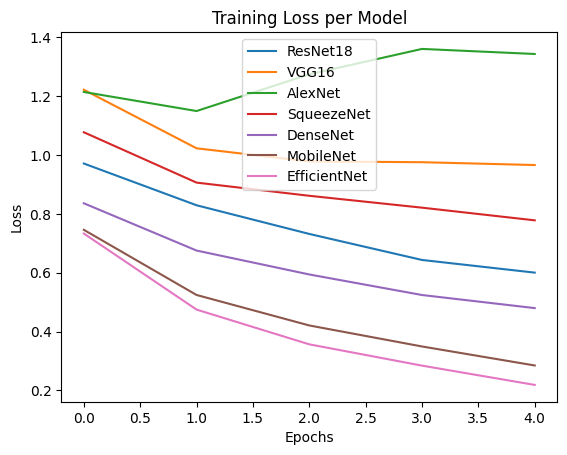


Model Performance Summary:
ResNet18 - Accuracy: 0.7248, Precision: 0.7410, Recall: 0.7248, F1 Score: 0.7124
VGG16 - Accuracy: 0.6266, Precision: 0.5368, Recall: 0.6266, F1 Score: 0.5649
AlexNet - Accuracy: 0.4830, Precision: 0.2333, Recall: 0.4830, F1 Score: 0.3146
SqueezeNet - Accuracy: 0.6902, Precision: 0.6857, Recall: 0.6902, F1 Score: 0.6362
DenseNet - Accuracy: 0.7867, Precision: 0.7892, Recall: 0.7867, F1 Score: 0.7741
MobileNet - Accuracy: 0.8657, Precision: 0.8682, Recall: 0.8657, F1 Score: 0.8662
EfficientNet - Accuracy: 0.8712, Precision: 0.8721, Recall: 0.8712, F1 Score: 0.8686


In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision.models import ResNet18_Weights, VGG16_Weights, AlexNet_Weights, SqueezeNet1_0_Weights, DenseNet121_Weights, MobileNet_V2_Weights, EfficientNet_B0_Weights
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import numpy as np

# Set device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Data transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Load datasets
train_dataset = torchvision.datasets.ImageFolder(root=TRAIN_ROOT, transform=transform)
test_dataset = torchvision.datasets.ImageFolder(root=TEST_ROOT, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Define models with weights
models = {
    'ResNet18': torchvision.models.resnet18(weights=ResNet18_Weights.DEFAULT),
    'VGG16': torchvision.models.vgg16(weights=VGG16_Weights.DEFAULT),
    'AlexNet': torchvision.models.alexnet(weights=AlexNet_Weights.DEFAULT),
    'SqueezeNet': torchvision.models.squeezenet1_0(weights=SqueezeNet1_0_Weights.DEFAULT),
    'DenseNet': torchvision.models.densenet121(weights=DenseNet121_Weights.DEFAULT),
    'MobileNet': torchvision.models.mobilenet_v2(weights=MobileNet_V2_Weights.DEFAULT),
    'EfficientNet': torchvision.models.efficientnet_b0(weights=EfficientNet_B0_Weights.DEFAULT)
}

# Modify each model's final layer for fungi classification (adjust num_classes)
num_classes = len(label_folders)
for model_name, model in models.items():
    if 'resnet' in model_name.lower():
        model.fc = nn.Linear(model.fc.in_features, num_classes)
    elif 'vgg' in model_name.lower() or 'alexnet' in model_name.lower():
        model.classifier[-1] = nn.Linear(model.classifier[-1].in_features, num_classes)
    elif 'squeezenet' in model_name.lower():
        model.classifier[1] = nn.Conv2d(512, num_classes, kernel_size=(1, 1))
        model.num_classes = num_classes
    elif 'densenet' in model_name.lower():
        model.classifier = nn.Linear(model.classifier.in_features, num_classes)
    elif 'mobilenet' in model_name.lower() or 'efficientnet' in model_name.lower():
        model.classifier[-1] = nn.Linear(model.classifier[-1].in_features, num_classes)
    model = model.to(device)

# Training function
def train_model(model, optimizer, criterion, num_epochs=5):
    train_loss = []
    model.train()
    for epoch in range(num_epochs):
        epoch_loss = 0
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item()
        avg_loss = epoch_loss / len(train_loader)
        train_loss.append(avg_loss)
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.4f}')
    return train_loss

# Evaluation function
def evaluate_model(model):
    model.eval()
    y_true, y_pred = [], []
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            y_true.extend(labels.cpu().numpy())
            y_pred.extend(predicted.cpu().numpy())
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')
    return accuracy, precision, recall, f1

# Train and evaluate each model
results = {}
for model_name, model in models.items():
    print(f'\nTraining {model_name}...')
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    train_loss = train_model(model, optimizer, criterion)

    # Plot loss
    plt.plot(train_loss, label=model_name)

    # Evaluate model
    accuracy, precision, recall, f1 = evaluate_model(model)
    results[model_name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    }
    print(f'{model_name} - Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}')

# Display results
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss per Model')
plt.legend()
plt.show()

print("\nModel Performance Summary:")
for model_name, metrics in results.items():
    print(f"{model_name} - Accuracy: {metrics['Accuracy']:.4f}, Precision: {metrics['Precision']:.4f}, Recall: {metrics['Recall']:.4f}, F1 Score: {metrics['F1 Score']:.4f}")


10 epochs


Training ResNet18...
Epoch [1/10], Loss: 0.4026
Epoch [2/10], Loss: 0.2960
Epoch [3/10], Loss: 0.2616
Epoch [4/10], Loss: 0.2009
Epoch [5/10], Loss: 0.1663
Epoch [6/10], Loss: 0.1452
Epoch [7/10], Loss: 0.1241
Epoch [8/10], Loss: 0.1114
Epoch [9/10], Loss: 0.0833
Epoch [10/10], Loss: 0.1040
ResNet18 - Accuracy: 0.8295, Precision: 0.8305, Recall: 0.8295, F1 Score: 0.8275

Training VGG16...
Epoch [1/10], Loss: 0.9343
Epoch [2/10], Loss: 0.9249
Epoch [3/10], Loss: 0.9033
Epoch [4/10], Loss: 0.8761
Epoch [5/10], Loss: 1.0027
Epoch [6/10], Loss: 0.9690
Epoch [7/10], Loss: 0.8939
Epoch [8/10], Loss: 0.9484
Epoch [9/10], Loss: 0.8819
Epoch [10/10], Loss: 0.8655
VGG16 - Accuracy: 0.6091, Precision: 0.6250, Recall: 0.6091, F1 Score: 0.6066

Training AlexNet...
Epoch [1/10], Loss: 1.3437
Epoch [2/10], Loss: 1.3417
Epoch [3/10], Loss: 1.3410
Epoch [4/10], Loss: 1.3420
Epoch [5/10], Loss: 1.3420
Epoch [6/10], Loss: 1.3412
Epoch [7/10], Loss: 1.3416
Epoch [8/10], Loss: 1.3402
Epoch [9/10], Loss: 1

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


AlexNet - Accuracy: 0.4830, Precision: 0.2333, Recall: 0.4830, F1 Score: 0.3146

Training SqueezeNet...
Epoch [1/10], Loss: 0.7580
Epoch [2/10], Loss: 0.7218
Epoch [3/10], Loss: 0.7073
Epoch [4/10], Loss: 0.6944
Epoch [5/10], Loss: 0.6679
Epoch [6/10], Loss: 0.6507
Epoch [7/10], Loss: 0.6363
Epoch [8/10], Loss: 0.6118
Epoch [9/10], Loss: 0.6162
Epoch [10/10], Loss: 0.5607
SqueezeNet - Accuracy: 0.7423, Precision: 0.7445, Recall: 0.7423, F1 Score: 0.7254

Training DenseNet...
Epoch [1/10], Loss: 0.4654
Epoch [2/10], Loss: 0.4063
Epoch [3/10], Loss: 0.3645
Epoch [4/10], Loss: 0.3060
Epoch [5/10], Loss: 0.2651
Epoch [6/10], Loss: 0.2354
Epoch [7/10], Loss: 0.2207
Epoch [8/10], Loss: 0.1853
Epoch [9/10], Loss: 0.1672
Epoch [10/10], Loss: 0.1447
DenseNet - Accuracy: 0.8575, Precision: 0.8711, Recall: 0.8575, F1 Score: 0.8607

Training MobileNet...
Epoch [1/10], Loss: 0.2871
Epoch [2/10], Loss: 0.2292
Epoch [3/10], Loss: 0.1841
Epoch [4/10], Loss: 0.1988
Epoch [5/10], Loss: 0.1546
Epoch [6/1

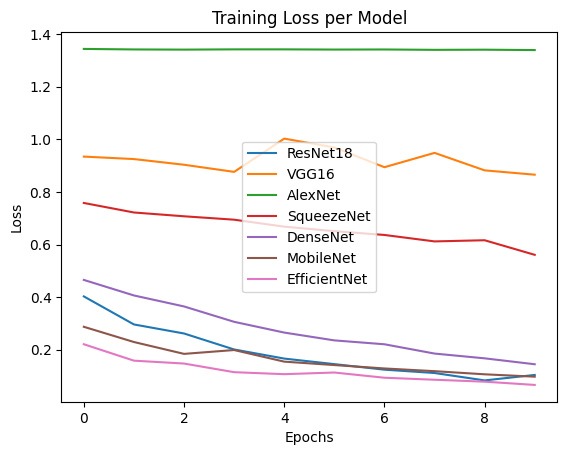


Model Performance Summary:
ResNet18 - Accuracy: 0.8295, Precision: 0.8305, Recall: 0.8295, F1 Score: 0.8275
VGG16 - Accuracy: 0.6091, Precision: 0.6250, Recall: 0.6091, F1 Score: 0.6066
AlexNet - Accuracy: 0.4830, Precision: 0.2333, Recall: 0.4830, F1 Score: 0.3146
SqueezeNet - Accuracy: 0.7423, Precision: 0.7445, Recall: 0.7423, F1 Score: 0.7254
DenseNet - Accuracy: 0.8575, Precision: 0.8711, Recall: 0.8575, F1 Score: 0.8607
MobileNet - Accuracy: 0.8854, Precision: 0.8860, Recall: 0.8854, F1 Score: 0.8854
EfficientNet - Accuracy: 0.8975, Precision: 0.9001, Recall: 0.8975, F1 Score: 0.8982


In [ ]:


# Training function
def train_model(model, optimizer, criterion, num_epochs=10):
    train_loss = []
    model.train()
    for epoch in range(num_epochs):
        epoch_loss = 0
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item()
        avg_loss = epoch_loss / len(train_loader)
        train_loss.append(avg_loss)
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.4f}')
    return train_loss

# Evaluation function
def evaluate_model(model):
    model.eval()
    y_true, y_pred = [], []
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            y_true.extend(labels.cpu().numpy())
            y_pred.extend(predicted.cpu().numpy())
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')
    return accuracy, precision, recall, f1

# Train and evaluate each model
results = {}
for model_name, model in models.items():
    print(f'\nTraining {model_name}...')
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    train_loss = train_model(model, optimizer, criterion)

    # Plot loss
    plt.plot(train_loss, label=model_name)

    # Evaluate model
    accuracy, precision, recall, f1 = evaluate_model(model)
    results[model_name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    }
    print(f'{model_name} - Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}')

# Display results
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss per Model')
plt.legend()
plt.show()

print("\nModel Performance Summary:")
for model_name, metrics in results.items():
    print(f"{model_name} - Accuracy: {metrics['Accuracy']:.4f}, Precision: {metrics['Precision']:.4f}, Recall: {metrics['Recall']:.4f}, F1 Score: {metrics['F1 Score']:.4f}")


15 epochs

In [ ]:


# Training function
def train_model(model, optimizer, criterion, num_epochs=15):
    train_loss = []
    model.train()
    for epoch in range(num_epochs):
        epoch_loss = 0
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item()
        avg_loss = epoch_loss / len(train_loader)
        train_loss.append(avg_loss)
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.4f}')
    return train_loss

# Evaluation function
def evaluate_model(model):
    model.eval()
    y_true, y_pred = [], []
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            y_true.extend(labels.cpu().numpy())
            y_pred.extend(predicted.cpu().numpy())
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')
    return accuracy, precision, recall, f1

# Train and evaluate each model
results = {}
for model_name, model in models.items():
    print(f'\nTraining {model_name}...')
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    train_loss = train_model(model, optimizer, criterion)

    # Plot loss
    plt.plot(train_loss, label=model_name)

    # Evaluate model
    accuracy, precision, recall, f1 = evaluate_model(model)
    results[model_name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    }
    print(f'{model_name} - Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}')

# Display results
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss per Model')
plt.legend()
plt.show()

print("\nModel Performance Summary:")
for model_name, metrics in results.items():
    print(f"{model_name} - Accuracy: {metrics['Accuracy']:.4f}, Precision: {metrics['Precision']:.4f}, Recall: {metrics['Recall']:.4f}, F1 Score: {metrics['F1 Score']:.4f}")


LRP

Epoch [1/10], Loss: 0.7420
Epoch [2/10], Loss: 0.4974
Epoch [3/10], Loss: 0.3657
Epoch [4/10], Loss: 0.2792
Epoch [5/10], Loss: 0.2255
Epoch [6/10], Loss: 0.1841
Epoch [7/10], Loss: 0.1503
Epoch [8/10], Loss: 0.1368
Epoch [9/10], Loss: 0.1188
Epoch [10/10], Loss: 0.1139


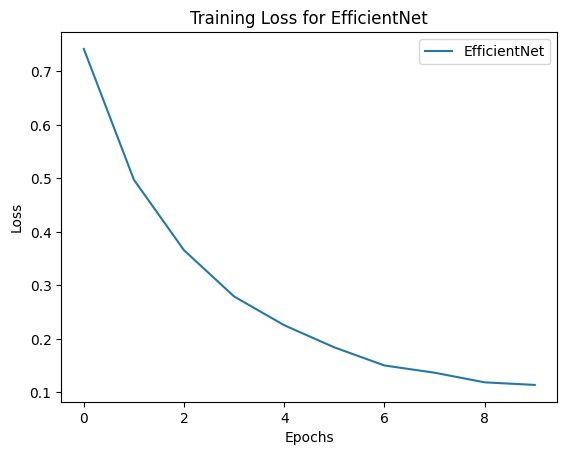

EfficientNet - Accuracy: 0.9134, Precision: 0.9149, Recall: 0.9134, F1 Score: 0.9125


TypeError: pic should be PIL Image or ndarray. Got <class 'torch.Tensor'>

<Figure size 1500x1000 with 0 Axes>

In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from torchvision import transforms, datasets
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import torchvision.models as models
import torch.nn as nn
import torch.optim as optim

# Define device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load the EfficientNet model and modify the final layer for num_classes
num_classes = 5
efficientnet = models.efficientnet_b0(weights='EfficientNet_B0_Weights.DEFAULT')
efficientnet.classifier[-1] = nn.Linear(efficientnet.classifier[-1].in_features, num_classes)
efficientnet = efficientnet.to(device)

# Load and preprocess dataset
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])
train_dataset = datasets.ImageFolder(root='/content/data/defungi_split/train', transform=transform)
test_dataset = datasets.ImageFolder(root='/content/data/defungi_split/test', transform=transform)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=32, shuffle=False)

# Training function
def train_model(model, optimizer, criterion, num_epochs=10):
    train_loss = []
    model.train()
    for epoch in range(num_epochs):
        epoch_loss = 0
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item()
        avg_loss = epoch_loss / len(train_loader)
        train_loss.append(avg_loss)
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.4f}')
    return train_loss

# Evaluate function
def evaluate_model(model):
    model.eval()
    y_true, y_pred = [], []
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            y_true.extend(labels.cpu().numpy())
            y_pred.extend(predicted.cpu().numpy())
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')
    return accuracy, precision, recall, f1

# Train EfficientNet model and display training loss
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(efficientnet.parameters(), lr=0.001)
train_loss = train_model(efficientnet, optimizer, criterion)

plt.plot(train_loss, label='EfficientNet')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss for EfficientNet')
plt.legend()
plt.show()

# Evaluate EfficientNet model
accuracy, precision, recall, f1 = evaluate_model(efficientnet)
print(f'EfficientNet - Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}')

# LRP for EfficientNet
def apply_lrp_on_efficientnet(model, input_tensor):
    relevance = input_tensor.clone().detach().to(device)
    relevance.requires_grad_(True)

    for name, layer in reversed(list(model.named_children())):
        if isinstance(layer, nn.Linear) or isinstance(layer, nn.Conv2d):
            output = layer(relevance)
            grad_output = relevance.grad_fn(output)
            relevance = grad_output.detach().clone()
        elif isinstance(layer, nn.AdaptiveAvgPool2d):
            relevance = torch.nn.functional.interpolate(relevance, size=(input_tensor.shape[2], input_tensor.shape[3]))
    return relevance

# Visualize LRP on one image per label
def visualize_lrp_for_each_label(dataset, num_classes):
    label_images = {}
    for img, lbl in dataset:
        if lbl not in label_images:
            label_images[lbl] = img
            if len(label_images) == num_classes:
                break

    plt.figure(figsize=(15, 10))
    for label, img in label_images.items():
        # Preprocess the image
        image_tensor = transform(img).unsqueeze(0).to(device)

        # Perform LRP
        relevance = apply_lrp_on_efficientnet(efficientnet, image_tensor)

        # Transform relevance to a format suitable for visualization
        relevance = relevance.squeeze().cpu().detach().numpy()
        relevance = np.sum(relevance, axis=0)  # Sum across color channels
        relevance = np.interp(relevance, (relevance.min(), relevance.max()), (0, 1))  # Normalize to [0, 1]

        # Plot the original image and its LRP relevance
        plt.subplot(2, num_classes, label + 1)
        plt.imshow(image_tensor.squeeze().permute(1, 2, 0).cpu().numpy() * 0.5 + 0.5)  # Unnormalize for display
        plt.title(f"Original Label {label}")
        plt.axis("off")

        plt.subplot(2, num_classes, num_classes + label + 1)
        plt.imshow(relevance, cmap="hot", interpolation="nearest")
        plt.colorbar()
        plt.title(f"LRP for Label {label}")
        plt.axis("off")

    plt.tight_layout()
    plt.show()

# Run the LRP visualization function
visualize_lrp_for_each_label(test_dataset, num_classes)


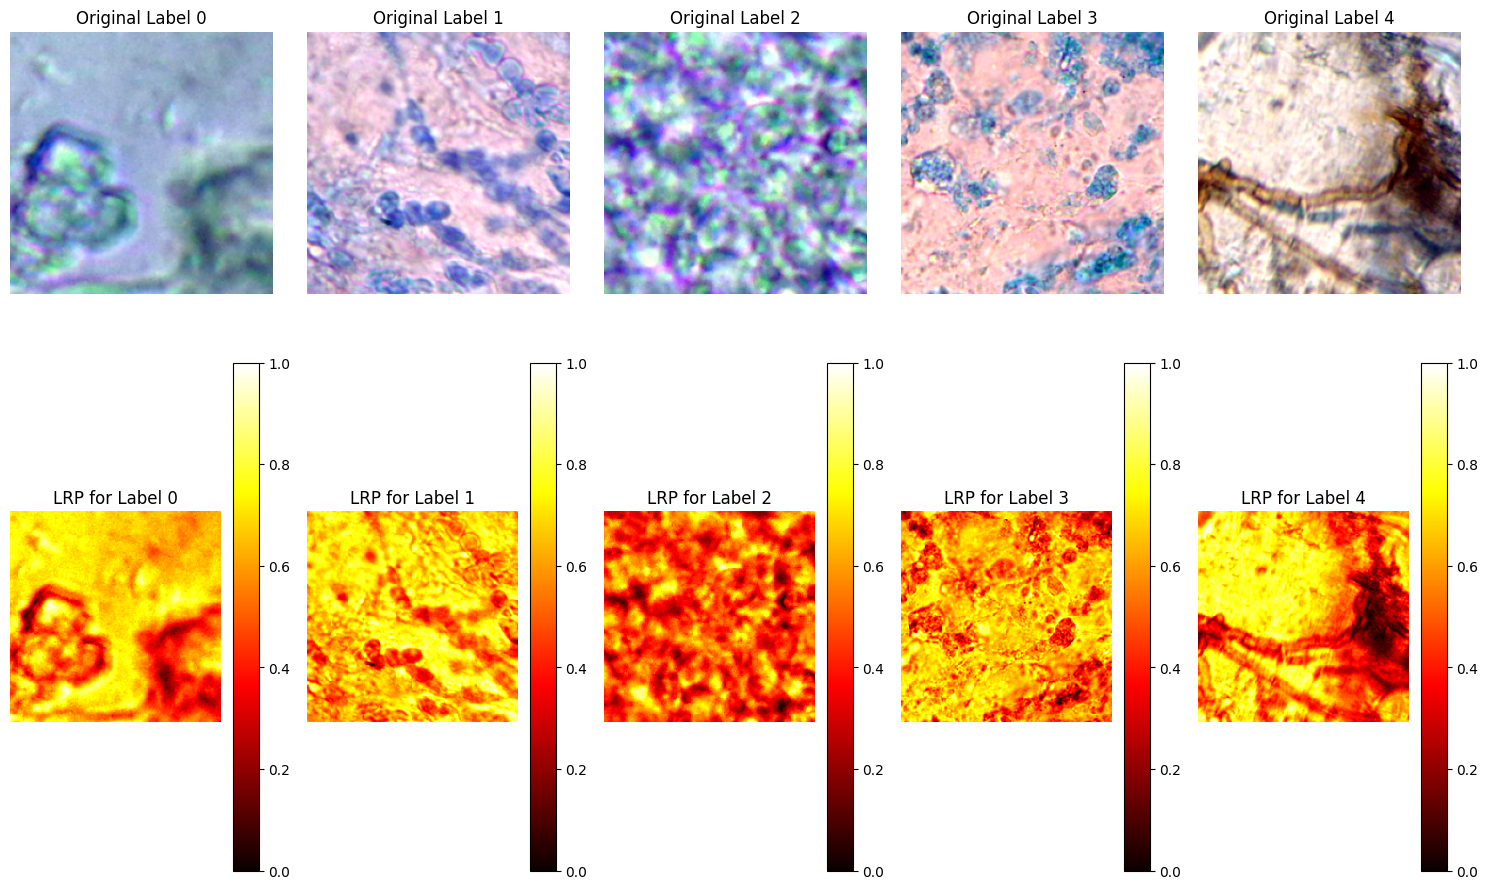

In [ ]:
def visualize_lrp_for_each_label(dataset, num_classes):
    label_images = {}
    for img, lbl in dataset:
        if lbl not in label_images:
            label_images[lbl] = img
            if len(label_images) == num_classes:
                break

    plt.figure(figsize=(15, 10))
    for label, img in label_images.items():
        # Ensure image is in tensor format
        if not isinstance(img, torch.Tensor):
            img = transform(img)
        image_tensor = img.unsqueeze(0).to(device)

        # Perform LRP
        relevance = apply_lrp_on_efficientnet(efficientnet, image_tensor)

        # Transform relevance to a format suitable for visualization
        relevance = relevance.squeeze().cpu().detach().numpy()
        relevance = np.sum(relevance, axis=0)  # Sum across color channels
        relevance = np.interp(relevance, (relevance.min(), relevance.max()), (0, 1))  # Normalize to [0, 1]

        # Plot the original image and its LRP relevance
        plt.subplot(2, num_classes, label + 1)
        plt.imshow(image_tensor.squeeze().permute(1, 2, 0).cpu().numpy() * 0.5 + 0.5)  # Unnormalize for display
        plt.title(f"Original Label {label}")
        plt.axis("off")

        plt.subplot(2, num_classes, num_classes + label + 1)
        plt.imshow(relevance, cmap="hot", interpolation="nearest")
        plt.colorbar()
        plt.title(f"LRP for Label {label}")
        plt.axis("off")

    plt.tight_layout()
    plt.show()

# Run the LRP visualization function
visualize_lrp_for_each_label(test_dataset, num_classes)
